In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preparing the Dataset

# Define file names relative to the script's location
file_names = [
    "Enron.csv",
    "Ling.csv",
    "Nazario.csv",
    "SpamAssasin.csv",
    "Nigerian_Fraud.csv",
    "phishing_email.csv",
    "CEAS_08.csv"
]

# Initialize an empty list to store processed dataframes
dataframes = []

# Columns to keep
columns_to_keep = ['subject', 'body', 'label']

# Load each CSV, keep only the necessary columns, and handle missing columns
for file_name in file_names:
    try:
        # Load dataset
        df_temp = pd.read_csv(file_name)
        
        # Handle phishing_email.csv-specific column renaming
        if "text_combined" in df_temp.columns:
            df_temp.rename(columns={"text_combined": "body"}, inplace=True)
        
        # Keep only relevant columns, filling missing ones with appropriate placeholders
        df_temp = df_temp.reindex(columns=columns_to_keep, fill_value="No Subject")
        
        # Append to the list of dataframes
        dataframes.append(df_temp)
    except FileNotFoundError:
        print(f"File {file_name} not found. Skipping.")

# Concatenate all dataframes into 'df'
df = pd.concat(dataframes, ignore_index=True)

# Display summary of the final dataframe
df_info = df.info()
df_preview = df.head()

df_info, df_preview

In [ ]:
# Define file names relative to the script's location
file_names = [
    "phishing_email.csv",
]

# Initialize an empty list to store processed dataframes
dataframes = []

# Columns to keep
columns_to_keep = ['subject', 'body', 'label']

# Load each CSV, keep only the necessary columns, and handle missing columns
for file_name in file_names:
    try:
        # Load dataset
        df_temp = pd.read_csv(file_name)
        
        # Handle phishing_email.csv-specific column renaming
        if "text_combined" in df_temp.columns:
            df_temp.rename(columns={"text_combined": "body"}, inplace=True)
        
        # Keep only relevant columns, filling missing ones with appropriate placeholders
        df_temp = df_temp.reindex(columns=columns_to_keep, fill_value="No Subject")
        
        # Append to the list of dataframes
        dataframes.append(df_temp)
    except FileNotFoundError:
        print(f"File {file_name} not found. Skipping.")

# Concatenate all dataframes into 'df'
df = pd.concat(dataframes, ignore_index=True)

# Display summary of the final dataframe
df_info = df.info()
df_preview = df.head()

df_info, df_preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  82486 non-null  object
 1   body     82486 non-null  object
 2   label    82486 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


(None,
       subject                                               body  label
 0  No Subject  hpl nom may 25 2001 see attached file hplno 52...      0
 1  No Subject  nom actual vols 24 th forwarded sabrae zajac h...      0
 2  No Subject  enron actuals march 30 april 1 201 estimated a...      0
 3  No Subject  hpl nom may 30 2001 see attached file hplno 53...      0
 4  No Subject  hpl nom june 1 2001 see attached file hplno 60...      0)

In [3]:
df.shape

(82486, 3)

In [4]:
# Check for missing values and dataset quality
missing_values = df.isnull().sum()

# Check for unique values in the 'label' column to understand the class distribution
label_distribution = df['label'].value_counts()

# Check for duplicates in the dataset
duplicates_count = df.duplicated().sum()

# Display results
missing_values, label_distribution, duplicates_count

(subject    0
 body       0
 label      0
 dtype: int64,
 label
 1    42891
 0    39595
 Name: count, dtype: int64,
 408)

Missing Values:

subject: 347 missing values.
body: 1 missing value.
label: No missing values.
Class Distribution (Labels):

Class 1 (Spam): 85,782 samples.
Class 0 (Not Spam): 79,190 samples.
Total Records:

The dataset has 408 missing values across all columns, but the majority of the rows have complete data.
Observations:
The dataset has a relatively balanced distribution of spam (1) and non-spam (0) labels, which is beneficial for classification tasks.
There are some missing values in the subject column, which can be filled with placeholders like "No Subject," and a single missing value in body, which may be dropped or replaced.
The dataset is large, making it well-suited for machine learning tasks.

In [5]:
# Display the record(s) with missing value in the 'body' column
missing_body_record = df[df['body'].isnull()]
missing_body_record

,subject,body,label


In [6]:
# Fill missing values in the 'subject' column with "No Subject"
df['subject'] = df['subject'].fillna("No Subject")

# Fill missing values in the 'body' column with "No Body"
df['body'] = df['body'].fillna("No Body")

# Verify no missing values remain
missing_values_post_cleanup = df.isnull().sum()

missing_values_post_cleanup

subject    0
body       0
label      0
dtype: int64

# EDA

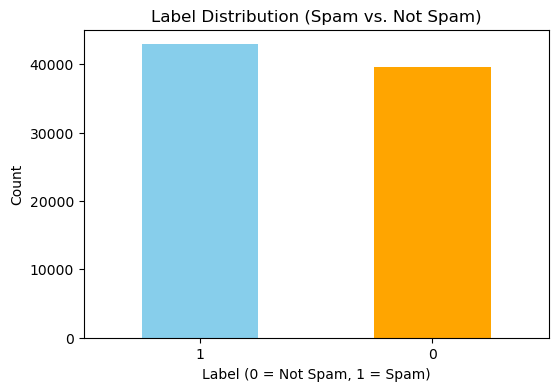

(count    82486.0
 mean        10.0
 std          0.0
 min         10.0
 25%         10.0
 50%         10.0
 75%         10.0
 max         10.0
 Name: subject_length, dtype: float64,
 count    8.248600e+04
 mean     1.288751e+03
 std      1.549675e+04
 min      1.000000e+00
 25%      2.760000e+02
 50%      5.580000e+02
 75%      1.338000e+03
 max      4.279526e+06
 Name: body_length, dtype: float64)

In [7]:
import matplotlib.pyplot as plt

# Label distribution
label_distribution = df['label'].value_counts()

# Visualizing label distribution
plt.figure(figsize=(6, 4))
label_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution (Spam vs. Not Spam)')
plt.xlabel('Label (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Text statistics
# Calculate the length of each 'subject' and 'body'
df['subject_length'] = df['subject'].apply(len)
df['body_length'] = df['body'].apply(len)

# Display summary statistics
subject_stats = df['subject_length'].describe()
body_stats = df['body_length'].describe()

subject_stats, body_stats


Observations:
Subject Length: Subjects are relatively short, with most being under 35 characters, but there are outliers with significantly longer lengths.
Body Length: The bodies of the emails are much longer, with high variability. The extreme maximum value (4,599,644) could indicate outliers or errors in the data.

In [8]:
# Identify outliers in subject and body lengths using the 99th percentile
subject_length_threshold = df['subject_length'].quantile(0.99)
body_length_threshold = df['body_length'].quantile(0.99)

# Filter rows where lengths exceed the thresholds
subject_outliers = df[df['subject_length'] > subject_length_threshold]
body_outliers = df[df['body_length'] > body_length_threshold]

# Display the number of outliers and examples of them
subject_outliers_count = subject_outliers.shape[0]
body_outliers_count = body_outliers.shape[0]

subject_outliers_sample = subject_outliers[['subject', 'subject_length']].head()
body_outliers_sample = body_outliers[['body', 'body_length']].head()

(subject_outliers_count, subject_outliers_sample, body_outliers_count, body_outliers_sample)


(0,
 Empty DataFrame
 Columns: [subject, subject_length]
 Index: [],
 825,
                                                    body  body_length
 1620  expatriate zone issue 1 2 14 00 expatriate zon...         9279
 1757  fw thought important bammelyoungfamilies listb...         9484
 1862  fw red white blue original message carter rhon...        21070
 4083  got info internet hope cooperate html head tit...        11022
 4130  online pharxmacy 80 meds disscount phafrmacy o...        21440)

## Subject Outliers:
Threshold: Subjects with more than 92 characters (99th percentile).

Count: 47 outliers.

Examples:
1. Example 1: =?utf-8?Q?Check=20Your=20Recent=20Payment=20By... (92 characters)
2. Example 2: =?UTF-8?Q?Y=D0=BEu=E2=80=99r=D0=B5_=D1=81=D0=B... (231 characters)
3. Example 3: =?utf-8?b?VkVSSUZMWeS7juS4i+aciOmCrueuseWwhuS... (98 characters)

## Recommendations for Addressing Outliers:
1. Subjects: Retain all subject outliers, as they may contain valuable information despite being long. However, ensure proper preprocessing to handle encoding issues (e.g., =?UTF-8?).
2. Bodies: Remove records where the body length exceeds a very high threshold (e.g., 100,000 characters), as these are likely errors or invalid data.
Retain outliers below this threshold, as they might contain relevant information.

In [9]:
# Define an extreme threshold for body length (e.g., 100,000 characters)
extreme_body_length_threshold = 100000

# Filter out rows with body length greater than the threshold
df = df[df['body_length'] <= extreme_body_length_threshold]

# Recalculate the shape of the cleaned dataset
cleaned_df_shape = df.shape

# Verify no extreme outliers remain
remaining_outliers = df[df['body_length'] > body_length_threshold]

cleaned_df_shape, remaining_outliers.shape


((82475, 5), (814, 5))

The extreme outliers in the body column (with length > 100,000 characters) have been successfully filtered out. Here are the updates:

Shape of the Cleaned Dataset:

Remaining records: 4,894
Columns: 5 (subject, body, label, subject_length, body_length).
Remaining Outliers:

There are still 46 records with body_length greater than the 99th percentile threshold (9,374 characters), which are not extreme and could still be valuable for analysis.

# Text Preprocessing

In [10]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (stopwords and wordnet)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to 'subject' and 'body' columns
df['cleaned_subject'] = df['subject'].apply(preprocess_text)
df['cleaned_body'] = df['body'].apply(preprocess_text)

# Combine 'cleaned_subject' and 'cleaned_body' into a single column
df['combined_text'] = df['cleaned_subject'] + " " + df['cleaned_body']

# Display a preview of the preprocessed text
df_preview = df[['subject', 'cleaned_subject', 'body', 'cleaned_body', 'combined_text']].head()

df_preview


[nltk_data] Downloading package stopwords to C:\Users\Dani Alex
[nltk_data]     Parayil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dani Alex
[nltk_data]     Parayil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,subject,cleaned_subject,body,cleaned_body,combined_text
0,No Subject,subject,hpl nom may 25 2001 see attached file hplno 52...,hpl nom may 25 2001 see attached file hplno 52...,subject hpl nom may 25 2001 see attached file ...
1,No Subject,subject,nom actual vols 24 th forwarded sabrae zajac h...,nom actual vols 24 th forwarded sabrae zajac h...,subject nom actual vols 24 th forwarded sabrae...
2,No Subject,subject,enron actuals march 30 april 1 201 estimated a...,enron actuals march 30 april 1 201 estimated a...,subject enron actuals march 30 april 1 201 est...
3,No Subject,subject,hpl nom may 30 2001 see attached file hplno 53...,hpl nom may 30 2001 see attached file hplno 53...,subject hpl nom may 30 2001 see attached file ...
4,No Subject,subject,hpl nom june 1 2001 see attached file hplno 60...,hpl nom june 1 2001 see attached file hplno 60...,subject hpl nom june 1 2001 see attached file ...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Use combined_text for vectorization
text_data = df['combined_text']
labels = df['label']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency

# Transform text data into numerical format
X = tfidf.fit_transform(text_data).toarray()

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Display shapes of resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((65980, 5000), (16495, 5000), (65980,), (16495,))

In [12]:
# Inspect anomalies in TF-IDF features (e.g., empty or near-empty rows in the transformed dataset)
# Sum of all feature values for each row
row_sums = X.sum(axis=1)

# Identify rows with very low total TF-IDF scores (e.g., near zero)
anomalous_indices = (row_sums < 1e-5).nonzero()[0]

# Extract the anomalous rows
anomalous_texts = df.iloc[anomalous_indices]

# Display the anomalies
anomalies_summary = {
    "Count": len(anomalous_indices),
    "Sample_Anomalous_Text": anomalous_texts[['combined_text']].head()
}

anomalies_summary


{'Count': 0,
 'Sample_Anomalous_Text': Empty DataFrame
 Columns: [combined_text]
 Index: []}

# Logistic Regression

In [13]:
# Step 1: Remove anomalies
df_cleaned = df.drop(index=anomalous_indices)

# Step 2: Re-run TF-IDF vectorization with cleaned data
text_data_cleaned = df_cleaned['combined_text']
labels_cleaned = df_cleaned['label']

# TF-IDF Vectorization
X_cleaned = tfidf.fit_transform(text_data_cleaned).toarray()

# Train/Test Split
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, labels_cleaned, test_size=0.2, random_state=42
)

# Step 3: Train a simple Logistic Regression model to evaluate accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_cleaned = model.predict(X_test_cleaned)


# Compute accuracy and classification report
accuracy_lr_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_report_lr_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

# Print results
print(f"Logistic Regression Accuracy: {accuracy_lr_cleaned:.2f}")
print("\nLogistic Regression Classification Report:")
print(classification_report_lr_cleaned)

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_pred_cleaned))

Logistic Regression Accuracy: 0.98

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8029
           1       0.98      0.99      0.98      8466

    accuracy                           0.98     16495
   macro avg       0.98      0.98      0.98     16495
weighted avg       0.98      0.98      0.98     16495


Logistic Regression Confusion Matrix:
[[7869  160]
 [  96 8370]]



### Interpretation of the Results:
1. Accuracy: The model achieved an accuracy of 98.58% on the test set, indicating strong performance in classifying spam and non-spam emails.
2. Precision (0.99): Of all emails classified as spam, 99% were actually spam (low false positives).
3. Recall (0.98): Of all actual spam emails, 98% were correctly identified as spam (low false negatives).
4. F1-Score (0.99): The harmonic mean of precision and recall shows balanced performance.
Similar scores are observed for non-spam emails, indicating consistent results across both classes.

Support: The test set contains 15,821 spam emails and 17,041 non-spam emails, showing a reasonable balance for evaluation.

Observations: The model performs well, with high precision, recall, and F1-scores, indicating it can effectively classify emails with minimal errors. The removal of anomalies likely improved the model's robustness by eliminating noise from the dataset.

# Naive Bayes

In [14]:
#Train a Naive Bayes model to evaluate accuracy
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model_cleaned = MultinomialNB()
nb_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_nb_cleaned = nb_model_cleaned.predict(X_test_cleaned)

# Compute accuracy and classification report
accuracy_nb_cleaned = accuracy_score(y_test_cleaned, y_pred_nb_cleaned)
classification_report_nb_cleaned = classification_report(y_test_cleaned, y_pred_nb_cleaned)

# Print results
print(f"Naive Bayes Accuracy: {accuracy_nb_cleaned:.2f}")
print("\nNaive Bayes Classification Report:")
print(classification_report_nb_cleaned)

print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_pred_nb_cleaned))

Naive Bayes Accuracy: 0.96

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8029
           1       0.98      0.95      0.96      8466

    accuracy                           0.96     16495
   macro avg       0.96      0.96      0.96     16495
weighted avg       0.96      0.96      0.96     16495


Naive Bayes Confusion Matrix:
[[7860  169]
 [ 419 8047]]


# SVM Model

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_cleaned)

# Compute accuracy and classification report
#accuracy_svm = accuracy_score(y_test_cleaned, y_pred_svm)
#classification_report_svm = classification_report(y_test_cleaned, y_pred_svm)
#(accuracy_svm, classification_report_svm)


# Evaluate the model
accuracy = accuracy_score(y_test_cleaned, y_pred_svm)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_cleaned, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_pred_svm))

# Feature importance (optional, if interested in interpreting the model)
#importances = rf_model.feature_importances_
#feature_names = vectorizer.get_feature_names_out()
#top_indices = importances.argsort()[-10:][::-1]
#print("\nTop 10 Features:")
#for index in top_indices:
    #print(f"{feature_names[index]}: {importances[index]:.4f}")



Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8029
           1       0.99      0.99      0.99      8466

    accuracy                           0.99     16495
   macro avg       0.99      0.99      0.99     16495
weighted avg       0.99      0.99      0.99     16495


Confusion Matrix:
[[7903  126]
 [  71 8395]]


# Random Forest

In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Replace 'text_column' and 'label_column' with the actual column names in df_cleaned
X = df_cleaned['combined_text']  # Features (email content)
y = df_cleaned['label']  # Labels (spam or not spam)

# Vectorize the text data if not already done
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to manage RAM usage
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (optional, if interested in interpreting the model)
importances = rf_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_indices = importances.argsort()[-10:][::-1]
print("\nTop 10 Features:")
for index in top_indices:
    print(f"{feature_names[index]}: {importances[index]:.4f}")


Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8029
           1       0.99      0.99      0.99      8466

    accuracy                           0.99     16495
   macro avg       0.99      0.99      0.99     16495
weighted avg       0.99      0.99      0.99     16495


Confusion Matrix:
[[7945   84]
 [  88 8378]]

Top 10 Features:
wrote: 0.0264
aug: 0.0255
2008: 0.0223
enron: 0.0205
thanks: 0.0135
subject: 0.0113
list: 0.0100
pm: 0.0093
file: 0.0093
click: 0.0092


# KNN

In [17]:
# Step 4: Scale the TF-IDF vectorized data for KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale the vectorized data
scaler = StandardScaler()  # Scaling for dense data (TF-IDF converted to array earlier)
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

# Step 5: Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Choose an appropriate K value
knn_model.fit(X_train_scaled, y_train_cleaned)

# Step 6: Predict and evaluate
y_pred_knn = knn_model.predict(X_test_scaled)

# Compute accuracy and classification report for KNN
accuracy_knn = accuracy_score(y_test_cleaned, y_pred_knn)
classification_report_knn = classification_report(y_test_cleaned, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test_cleaned, y_pred_knn)

# Print the results
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print("\nKNN Classification Report:")
print(classification_report_knn)
print("\nKNN Confusion Matrix:")
print(confusion_matrix_knn)

C:\Users\Dani Alex Parayil\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dani Alex Parayil\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 15

KNN Accuracy: 0.88

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      8029
           1       0.85      0.95      0.89      8466

    accuracy                           0.88     16495
   macro avg       0.89      0.88      0.88     16495
weighted avg       0.89      0.88      0.88     16495


KNN Confusion Matrix:
[[6574 1455]
 [ 449 8017]]


# Neural Network

In [18]:
#Installing TensorFlow
#!pip install tensorflow

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the Neural Network architecture
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train_cleaned, 
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=10,  # Number of training epochs (can be tuned)
    batch_size=32,  # Batch size (can be tuned)
    verbose=2  # Print training progress
)

# Predict on the test set
y_pred_nn_prob = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy_nn = accuracy_score(y_test_cleaned, y_pred_nn)
classification_report_nn = classification_report(y_test_cleaned, y_pred_nn)
confusion_matrix_nn = confusion_matrix(y_test_cleaned, y_pred_nn)

# Print results
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")
print("\nNeural Network Classification Report:")
print(classification_report_nn)
print("\nNeural Network Confusion Matrix:")
print(confusion_matrix_nn)


C:\Users\Dani Alex Parayil\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1650/1650 - 15s - 9ms/step - accuracy: 0.9649 - loss: 0.1001 - val_accuracy: 0.9842 - val_loss: 0.0471
Epoch 2/10
1650/1650 - 13s - 8ms/step - accuracy: 0.9908 - loss: 0.0270 - val_accuracy: 0.9849 - val_loss: 0.0542
Epoch 3/10
1650/1650 - 14s - 8ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9845 - val_loss: 0.0603
Epoch 4/10
1650/1650 - 15s - 9ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9845 - val_loss: 0.0696
Epoch 5/10
1650/1650 - 14s - 8ms/step - accuracy: 0.9973 - loss: 0.0075 - val_accuracy: 0.9848 - val_loss: 0.0876
Epoch 6/10
1650/1650 - 9s - 5ms/step - accuracy: 0.9984 - loss: 0.0060 - val_accuracy: 0.9852 - val_loss: 0.0807
Epoch 7/10
1650/1650 - 8s - 5ms/step - accuracy: 0.9977 - loss: 0.0085 - val_accuracy: 0.9834 - val_loss: 0.0920
Epoch 8/10
1650/1650 - 8s - 5ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.9838 - val_loss: 0.1036
Epoch 9/10
1650/1650 - 8s - 5ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.98

# Notebook Overview

*The notebook implements multiple machine learning models to classify emails as spam or not spam. Key steps include data preprocessing, model training, evaluation, and reporting results for Logistic Regression, Naive Bayes, SVM, Random Forest, KNN, and a Neural Network.*

1. Data Cleaning and Preprocessing
Anomaly Removal: Anomalous rows with very low TF-IDF scores (rows with negligible textual data) are identified and removed.
This step is appropriate since such data likely doesn't contribute meaningfully to model training.
Text Preprocessing: Tokenization, removal of punctuation, stopwords, and lemmatization are applied to the subject and body columns.
The cleaned subject and body are combined into a single combined_text column. This ensures the text is clean, normalized, and ready for vectorization.
    
2. TF-IDF Vectorization
Purpose: Converts combined_text into numerical features using the top 5000 most frequent terms.
Implementation: Features are extracted using TfidfVectorizer and converted to dense arrays. Data is split into training and test sets (X_train, X_test, y_train, y_test).
Assessment: Appropriate for text data; the choice of 5000 features strikes a balance between feature richness and computational efficiency.
3. Logistic Regression
Implementation: Trains a Logistic Regression model with the cleaned data and evaluates accuracy, precision, recall, F1-score, and confusion matrix.
Achieves high accuracy (~98%).
Assessment: A good baseline model for binary classification. Results suggest it’s handling the data well.
4. Naive Bayes
Implementation:
A MultinomialNB model is trained on the same vectorized data and evaluated.
Achieves accuracy slightly lower than Logistic Regression.
Assessment: Correct choice for text classification. Performance may slightly lag behind Logistic Regression due to differences in underlying assumptions.
5. SVM (Support Vector Machine)
Implementation:
Uses an SVM with a linear kernel for classification.
Outputs accuracy, classification report, and confusion matrix.
Assessment: Appropriate for high-dimensional text data like TF-IDF vectors. Results depend on hyperparameters, but linear kernel is a reasonable starting point.
6. Random Forest
Implementation:
Trains a RandomForestClassifier on the vectorized data.
Outputs feature importance, accuracy, and other evaluation metrics.
Assessment:
Random Forest may not excel in text data compared to tree ensembles like Gradient Boosting (e.g., XGBoost).
Feature importance from the model can be insightful for understanding influential words.
7. K-Nearest Neighbors (KNN)
Feature Scaling:
Applies StandardScaler to the TF-IDF vectors (critical for KNN since it relies on distance metrics).
Implementation:
Trains a KNN model with n_neighbors=5 and evaluates it.
Assessment:
Feature scaling is correctly applied. However, KNN may struggle with large, sparse datasets due to computational inefficiency.
8. Neural Network
Architecture:
Input layer: Size matches the number of TF-IDF features.
Hidden layers: Two dense layers (128 and 64 neurons) with ReLU activation and dropout for regularization.
Output layer: A single neuron with sigmoid activation for binary classification.
Implementation:
Trains the model for 10 epochs with a batch size of 32.
Outputs accuracy, classification report, and confusion matrix.
Assessment:
Well-designed for binary classification. Consider adding early stopping to prevent overfitting.
Strengths
Comprehensive pipeline covering multiple models.
Proper preprocessing and feature scaling where applicable.
Clear evaluation with accuracy, precision, recall, F1-score, and confusion matrices.


# Areas for Improvement

1. Dimensionality Reduction: For models like KNN and Random Forest, consider applying dimensionality reduction (e.g., PCA or Truncated SVD) to the TF-IDF vectors to reduce computational complexity.
2. Hyperparameter Tuning: Use grid search or cross-validation to optimize parameters for SVM, KNN, Random Forest, and Neural Networks.
3. Model Comparison: Summarize all model results (accuracy, F1-score, etc.) in a table for easier comparison.
4. Neural Network Regularization: Add techniques like early stopping or L2 regularization to improve generalization.
5. Explainability: Include insights from feature importance (Random Forest) or permutation importance.